#This code examines the growth rate between covid cases and ambient air temperature in a region

I was interested in examining the relationship between covid cases and air temperature since the stability of the virus is though to be related to temperature

Formally this can be stated as: 

Ho: The rate at which covid-19 increases in a population is not related to air temperature

Ha: The rate at which covid-19 increases in a population is related to air temperature

In [1]:
#import packages for data analysis 
import pandas as pd
import numpy as np 

In [2]:
#import the data
covid_data = pd.read_excel('COVID-19-geographic-disbtribution-worldwide-2020-03-17.xlsx')

In [3]:
#create a list of countries and drop duplicates
lc = covid_data['Countries and territories'].values
lc = [i for n, i in enumerate(lc) if i not in lc[n + 1:]] 

In [4]:
#create a dictionary of data frames
dc = {}
for i in lc:
    dc[i] = covid_data[covid_data['Countries and territories'] == i]
    dc[i].index = list(range(0,len(dc[i])))

In [5]:
# add a total cases column to each dataframe 
for key in dc:
    for i in dc[key]:
        dc[key]['tot_cases'] = list(range(0,len(dc[key]['Cases'])))
        for i in range(0,len(dc[key])):
            dc[key]['tot_cases'][i] = sum(dc[key]['Cases'][i:len(dc[key]['Cases'])])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [6]:
#import plotting modules for later
import matplotlib.pyplot as plt

In [7]:
#fit regression models to each case
# limit countries to those with more than 100 cases
dcoh = {}
for key in dc.keys():
    if dc[key]['tot_cases'][0] >= 100:
        dcoh[key] = dc[key]    

#remove instances below fifty cases in the countries
for key in dcoh.keys():
    dcoh[key] = dcoh[key][dcoh[key]['tot_cases'] > 50]

#remove instances with less than four data points
dcohr = {}    
for key in dcoh.keys():
    if len(dcoh[key]['tot_cases']) > 3:
        dcohr[key] = dcoh[key]
        
#create column with increasing date
for key in dcohr.keys():
    dcohr[key]['AD50'] = list(range(0,len(dcohr[key]['Cases'])))[::-1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
# =============================================================================
# #plot the cases in each country to view the if there is a time where growth 
#     #flattens out
# for key in dcohr.keys():
#     plt.plot(dcohr[key]['AD50'], dcohr[key]['tot_cases'], marker = '.', 
#              linewidth = 0)
#     plt.xlabel(key)
#     plt.ylabel('Total Cases')
#     plt.show()
# =============================================================================

In [9]:
#limit the time period to the exponential growth phase

#only china and south korea show non exponential growth
#china at day 42 and south korea at day 15
ne = {'China':43, 'South_Korea':16}
for i in ne:
    dcohr[i] = dcohr[i].iloc[(len(dcohr[i]) -ne[i]):len(dcohr[i]),:]

In [10]:
#calculate the growth rate for each country 
grc = {}
for key in dcohr.keys():
    grc[key] = np.polyfit(dcohr[key]['AD50'], 
       np.log(dcohr[key]['tot_cases']), 1, 
       w=np.sqrt(dcohr[key]['tot_cases']))[0]

grc = pd.DataFrame.from_dict(grc, orient='index')

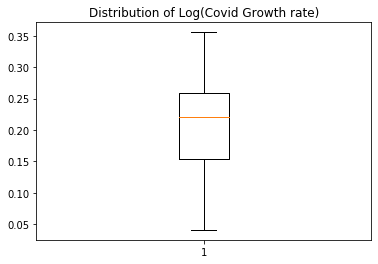

In [11]:
#quick boxplot to visualize growth rate distributions
import seaborn as sns
plt.boxplot(grc[0])
plt.title('Distribution of Log(Covid Growth rate)')
plt.show()

In [12]:
#find average air temperatures for countries in grc in Feb (C)
aat = {'Australia': 28, 'Austria':9.56,'Bahrain': 18.06,'Belgium':3.65, 
       'Brazil': 27, 'Canada': -2.5, 'China':-0.5, 'Czech_Republic': 1,
       'Denmark': 0.45, 'Egypt': 15.56, 'Estonia':-3.8,'Finland':1.8,
       'France': 8.6, 'Germany': 5.3, 'Greece':12.7, 'Iceland':0.4, 
       'India':18.2,'Indonesia':26.2, 'Iran': 6.2, 'Iraq': 13.1,'Ireland': 4.2, 
       'Israel':8.8, 'Italy':10.7, 'Japan':9, 'Kuwait':16.7, 'Lebanon':14.3,
       'Malaysia':29.4, 'Netherlands':6.9, 'Norway':-0.4, 'Philippines':27.8, 
       'Poland':3.6, 'Portugal':14.3, 'Qatar':20.2,'Romania':4.7,
       'San_Marino':8.7, 'Saudi_Arabia':19.1, 'Singapore':27.5,'Slovenia':4.5, 
       'South_Korea':3, 'Spain':11.5,'Sweden':1.3, 'Switzerland':5.7, 
       'Thailand':27.7, 'United_Kingdom':6.4, 'United_States_of_America':2.3}

In [13]:
#convert aat to dataframe
aat = pd.DataFrame.from_dict(aat, orient='index')

In [14]:
#merge aat and grc 
#first unindex these data frames 
aat = aat.reset_index()
grc = grc.reset_index()

In [15]:
#merge on index
aat_grc = pd.merge(left=aat, right=grc, left_on='index', right_on='index')

In [16]:
#rename columns
aat_grc.columns = ['country','ATF','GR']

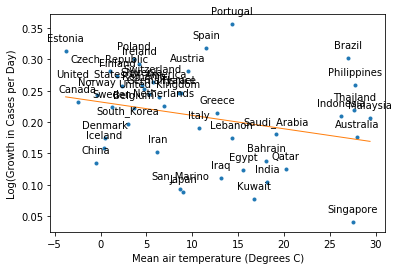

In [17]:
#plot to examine relationship between growth rate and temp
plt.plot(aat_grc['ATF'], aat_grc['GR'], marker='.', linewidth=0)
for i in range(len(aat_grc)):
    plt.annotate(aat_grc['country'][i], #text
                 (aat_grc['ATF'][i], aat_grc['GR'][i]), #point to label
                 textcoords="offset points", #position of the text
                 xytext=(0,10), #distance from text to points (x,y)
                 ha='center')
plt.xlabel('Mean air temperature (Degrees C)')
plt.ylabel('Log(Growth in Cases per Day)')

#fit a regression line between the exponential growth and temperature
ld = np.polyfit(aat_grc['ATF'], aat_grc['GR'], deg =1)

#plot the line
xn, xm = min(aat_grc['ATF']), max(aat_grc['ATF'])
yn, ym = ld[0]*xn+ ld[1], ld[0]*xm+ ld[1]
plt.plot([xn,xm], [yn,ym], linewidth=1)
plt.show()

In [18]:
#Use ols to create linear regression
from statsmodels.formula.api import ols
m = ols('GR ~ ATF', aat_grc).fit()
print(m.summary()) #p 0.06, r2 0.08 - not a strong relationship

                            OLS Regression Results                            
Dep. Variable:                     GR   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     3.642
Date:                Tue, 07 Apr 2020   Prob (F-statistic):             0.0630
Time:                        11:32:22   Log-Likelihood:                 56.508
No. Observations:                  45   AIC:                            -109.0
Df Residuals:                      43   BIC:                            -105.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2319      0.016     14.624      0.0

In [19]:
#The analysis shows that the rate at which covid-19 increases in a population is not related to air temperature

#What can be said for the variance in the data? Why are some countries showing faster growth rates than others?

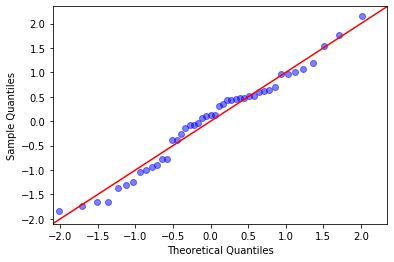

In [20]:
#view qq plot to examine residuals 
import statsmodels.api as sm
dq = (aat_grc['GR'] - (aat_grc['ATF']*ld[0]+ld[1])) / np.std(aat_grc['GR'])
sm.qqplot(dq, alpha= 0.5, line='45') 
plt.show() 

#There is perhaps some non-linearity in the data; seems quasi-linear

In [21]:
#Plot case number on original figure
#remove cruise ship from data 
ship = dcohr.pop('Cases_on_an_international_conveyance_Japan')    

#create vector of total cases 
tc = []
for key in dcohr.keys():
    tc.append(dcohr[key]['tot_cases'][min(dcohr[key]['tot_cases'].index)])

aat_grc['TC'] = tc

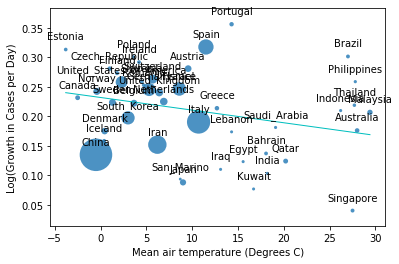

In [22]:
#plot to examine relationship between growth rate and temp
plt.scatter(aat_grc['ATF'], aat_grc['GR'], marker='.', 
         linewidth=0, s = aat_grc['TC']**0.75, alpha = 0.8)
for i in range(len(aat_grc)):
    plt.annotate(aat_grc['country'][i], #text
                 (aat_grc['ATF'][i], aat_grc['GR'][i]), #point to label
                 textcoords="offset points", #position of the text
                 xytext=(0,10), #distance from text to points (x,y)
                 ha='center')
plt.xlabel('Mean air temperature (Degrees C)')
plt.ylabel('Log(Growth in Cases per Day)')
plt.plot([xn,xm], [yn,ym], linewidth=1, c = 'c')
plt.show()

China, South Korea, and Italy all plot under the regression line. These countries all put strong social distancing measures into effect by March 17th. These countries also show greater case numbers, represented by larger circles, which could suggest that perhaps the rate of viral infection is already slowing down in these countries and the analysis failed to capture that. Many of the countries above the line show intermediate case numbers perhaps suggesting that countries fail to enact social distancing measures soon enough. The testing rate may also be contirubting to the variance in the data.  